In [ ]:
# https://www.lottomatica.it/lotterie/lotto
# https://www.igt.it/STORICO_ESTRAZIONI_LOTTO/storico.zip
# https://living-sun.com/it/python/705402-how-can-i-extract-a-closed-zip-with-python-python-zipfile.html


In [33]:
# importazione delle librerie
import pandas as pd
# Install pandas_ta if not already installed
import pandas_ta as ta
import numpy as np
import funzioni as fn
import matplotlib.pyplot as plt
from pprint import pprint
from itertools import combinations, permutations


CLASSI

In [26]:
class Numero:

    def __init__(self, n, nome_file_ruota):

        self.precedente_ritardo = 0                     # l'ultimo ritardo conosciuto
        self.frequenze = []
        self.frequenza_attuale = 0
        self.numero = n                                 # deve essere un vettore di massimo 5 numeri
        self.dataset = fn.leggi_da_csv(nome_file_ruota) # è il dataframe di ricerca informazioni             
        self.ruota = self.dataset[1][1]
        self.ritardi = []
        self.scompensi = []
        self.scomp = 0
        self.uscite_totali = 0
        

    def info(self):
        # impostazione del vettore che memorizza il numero della estrazione in cui esce, e serve per tutti i calcoli successivi
        temp = []
        #print(self.dataset[0][2:])
        tipo = len(self.numero)
        if tipo == 1:
            for i in range(len(self.dataset)):
                #print(self.dataset[i][2:])
                if str(self.numero[0]) in self.dataset[i][2:]:
                    temp.append(i+1)
        elif tipo > 1:
            # definisce l'ambo, il terno, la quaterna o la cinquina da cercare
            temp_n = []
            for i in self.numero:
                temp_n.append(str(i))
            temp_n = tuple(temp_n)
            #print(temp_n)

            for i in range(len(self.dataset)):
                comb = list(permutations(self.dataset[i][2:], tipo))
                #print(comb)
                
                if temp_n in comb:
                    temp.append(i+1)
            #print(temp)
            
        if len(temp) == 0:
            self.precedente_ritardo = len(self.dataset) + 1
            self.ultimo_ritardo = len(self.dataset) + 1
            self.ritardo_max = len(self.dataset) + 1
            self.frequenza_attuale = 0
            self.previsione = np.nan
            self.scomp = np.nan
            
        elif len(temp) == 1: 
            self.precedente_ritardo = 0
            self.ultimo_ritardo = temp[0]
            self.uscite_totali = len(temp)

            # calcolo delle scompensazioni
            for i in range(1, len(temp)):
                r = temp[i] - temp[i-1]                 # Ritardo del numero nel momento in cui è uscito
                self.ritardi.append(r)                  # archivio dei ritardi
                n_estr = temp[i]                        # numero della estrazione del numero nel momento in cui è uscito
                freq = int(n_estr / len(temp[:i]))      # frequenza nel momento in cui è uscito
                self.frequenze.append(freq)
                self.scomp += (r - freq)                # scompensazione nel momento in cui è uscito
                self.scompensi.append(self.scomp)

            self.ritardo_max = temp[0]
            self.frequenza_attuale = int((len(self.dataset)+1)/(len(temp)))
            self.previsione = self.frequenza_attuale - self.ultimo_ritardo

        else:
            self.precedente_ritardo = temp[len(temp)-1] - temp[len(temp)-2] # Ritardo precedente all'ultima uscita
            self.ultimo_ritardo = len(self.dataset) - temp[len(temp)-1]     # Ritardo all'ultima uscita
            self.uscite_totali = len(temp)
            
            # calcolo delle scompensazioni
            for i in range(1, len(temp)):
                r = temp[i] - temp[i-1]                 # Ritardo del numero nel momento in cui è uscito
                self.ritardi.append(r)                  # archivio dei ritardi
                n_estr = temp[i]                        # numero della estrazione del numero nel momento in cui è uscito
                freq = int(n_estr / len(temp[:i]))      # frequenza nel momento in cui è uscito
                self.frequenze.append(freq)
                self.scomp += (r - freq)                # scompensazione nel momento in cui è uscito
                self.scompensi.append(self.scomp)

            self.ritardo_max = max(self.ritardi)                        # massimo ritardo fatto dal numero
            self.frequenza_attuale = int((len(self.dataset)+1)/(len(temp)))   # frequenza attuale
            self.previsione = self.frequenza_attuale - self.ultimo_ritardo      # previsione di uscita calcolata sulla frequenza e il ritardo attiale

    def mostra_info(self):

        #valori = {
        #    "Numero" :             self.numero,
        #    "Ruota" :              self.ruota,
        #    "N. uscite" :           self.uscite_totali
        #    "Ritardo Precedente" : self.precedente_ritardo,
        #    "Ritardo Attuale" :    self.ultimo_ritardo,
        #    "Ritardo Massimo" :    self.ritardo_max,
        #    "Frequenza" :          self.frequenza_attuale,
        #    "Previsione" :         self.previsione,
        #    "Scompensazione":      self.scomp
        #}

        valori = [
            self.numero,
            self.ruota,
            self.uscite_totali,
            self.precedente_ritardo,
            self.ultimo_ritardo,
            self.ritardo_max,
            self.frequenza_attuale,
            self.previsione,
            self.scomp
            ]
    
        return valori
    
    def print_info(self):

        print(
            "\n","Numero", self.numero,
            "\n","Ruota", self.ruota,
            "\n","N. uscite", self.uscite_totali,
            "\n","Ritardo Precedente", self.precedente_ritardo,
            "\n","Ritardo Attuale", self.ultimo_ritardo,
            "\n","Ritardo Massimo", self.ritardo_max,
            "\n","Frequenza", self.frequenza_attuale,
            "\n","Previsione", self.previsione,
            "\n","Scompensazione", self.scomp
        )

    def spia(self, numero_estrezioni):
        tipo = len(self.numero)
        if tipo == 1:
            a = []
            for i in range(len(self.dataset)- numero_estrezioni):
                if str(self.numero[0]) in self.dataset[i][2:]:
                    for j in range(0, numero_estrezioni):
                        a += self.dataset[i+j][2:]
        
        risultato = trova_duplicati(a)

        return risultato





FUNZIONI

In [7]:
# Funzione per creare il dataset dei numeri in formato oggetto e richiamabili
def dataset_numeri(data):
    numeri = []
    for n in range(1, 91):
        t = Numero([n], data)
        numeri.append([n, t])
    
    return numeri

In [8]:
# Funzione per creare una tabella con tutte le statistiche di ogni numero
def print_numeri(data):
    numeri = []
    for n in range(1, 91):
        t = Numero([n], data)
        t.info()
        numeri.append(t.mostra_info())
    
    return numeri


In [9]:
# Funzione per creare una tabella con tutte le statistiche di ogni numero come un database pandas
def print_dataframe_from_numeri(data):
    numeri = print_numeri(data)
    df = pd.DataFrame(numeri, columns=[
                                        "Numero", 
                                        "Ruota", 
                                        "N. Uscite",
                                        "Ritardo Precedente",
                                        "Ritardo Attuale",
                                        "Ritardo Massimo", 
                                        "Frequenza", 
                                        "Previsione",
                                        "Scompensazione"
                                        ]
                    ).set_index(
                                [
                                    "Numero", 
                                    "Ruota"
                                ]
                            )

    return df

In [10]:
# Funzione per trovare i duplicati in una lista
def trova_duplicati(lista):

    nya_lista = set(lista)
    counting = []
    for element in nya_lista:
        count = 0
        for i in lista:
            if element == i:
                count += 1
        counting.append([count, element])

    return counting

In [11]:
# Funzione per trovare i numeri spia in ordine 
def numeri_spia_ordinati(numero, ruota, n_est_spia, n_spie):

    temp = Numero([numero], fn.PATH_ESTR+ruota+".csv")
    temp.info()
    spie = sorted(temp.spia(n_est_spia))
    spie_ordinate = []
    for i in range(1, (n_spie+1)):
        spie_ordinate.append(int(spie[-i][1]))

    return spie_ordinate

In [12]:
# Funzione per calcolare tutti i numeri spia per ogni estrazioni
def numeri_spia_ultima_estrazione(ruota, n_est_spia, n_spie):
    ultima_riga = fn.leggi_da_csv(fn.PATH_ESTR+ruota+'.csv')[-1]
    elenco = []
    for i in ultima_riga[2:]:
        temp = numeri_spia_ordinati(int(i), ruota, n_est_spia, n_spie)
        for i in temp:
            elenco.append(i)
    #print(elenco)
    elenco_ordinato = sorted(trova_duplicati(elenco))[-n_spie:]
    spie_totali = []
    for i in elenco_ordinato:
        spie_totali.append(i[1])

    return spie_totali


In [13]:
# Funzione per trovare i 20 numeri migliori come frequenza
def migliori_numeri(ruota, n_migliori):

    lista = []
    for i in range(1, 91):
        temp = Numero([i], fn.PATH_ESTR+ruota+".csv")
        temp.info()
        lista.append([temp.uscite_totali, i])

    new_lista = sorted(lista)
    numeri = []
    for i in range(len(new_lista[-n_migliori:])):
        numeri.append(new_lista[i][1])

    return numeri

In [14]:
# Funzione per trovare i migliori 3 ambi su un tot di numeri
def migliori_ambi(numeri, ruota):

    ambi = list(combinations(numeri, 2))

    migliori = []
    for i in ambi:

        temp = Numero(i, fn.PATH_ESTR+ruota+".csv")
        temp.info()
        if temp.ultimo_ritardo < 14:
            migliori.append([temp.uscite_totali, temp.ultimo_ritardo, i])

    temp = sorted(migliori)[-3:]
    ambi_da_abbinare = []
    for i in range(len(temp)):
        ambi_da_abbinare.append(temp[i][2])

    return ambi_da_abbinare

In [36]:
# Funzione per plottare i grafici
def plot_graph(pf):

    pf=pf.astype(float)
    plt.rcParams["figure.figsize"] = (36, 30)
    #plt.rcParams["savefig.format"] = 'png'  

    # plotting di tutte le curve 
    plt.plot(pf['close'][:], color='blue', label='ritardo')
    plt.plot(pf["SMA_10"][:], color='red', label='SMA_10')
    plt.plot(pf["SMA_30"][:], color='green', label='SMA_30')

    # configuraione degli assi
    plt.xlabel('Numero uscita',fontsize=18)
    plt.ylabel('Scompensazione',fontsize=18)

    # plot signals EMA_RSI_ATR
    #plt.plot(df.index, df['BuyEMA_RSI_ATR'], '^', markersize = 15, color = 'purple', label='BuyEMA_RSI_ATR') # plot ‘Buy’ signals
    #plt.plot(df.index, df['SellEMA_RSI_ATR'], 'v', markersize = 15, color = 'black', label='SellEMA_RSI_ATR') # plot ‘Sell’ signals

    # configurazioni del titolo, leggende, griglia
    plt.title('GRAFICO', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()

CODICE

In [18]:
numeri = []
for i in range(1, 91):
    numeri.append(i)

temp = Numero([58], fn.PATH_ESTR+"BA.csv")
temp.info()
#print(temp.uscite_totali)
temp.print_info()
temp.mostra_info()
spie = sorted(temp.spia(5))
#print(spie[-20:])
spie_ordinate = []
for i in range(1, 21):
    spie_ordinate.append(spie[-i][1])
print('20 Numeri spia a 5 estrazioni: \n',spie_ordinate)





 Numero [58] 
 Ruota BA 
 N. uscite 410 
 Ritardo Precedente 7 
 Ritardo Attuale 0 
 Ritardo Massimo 115 
 Frequenza 17 
 Previsione 17 
 Scompensazione 228
20 Numeri spia a 5 estrazioni: 
 ['58', '87', '15', '26', '30', '61', '51', '3', '69', '48', '40', '84', '89', '77', '76', '68', '60', '20', '10', '47']


In [19]:
# Programma su tutte le ruote

ruote = ["BA", "FI", "MI", "NA", "PA", "RM", "TO", "VE"]
for i in ruote:

    print('Calcolo sulla ruota di', i)
    n1 = numeri_spia_ultima_estrazione(i, 5, 20)
    n2 = migliori_numeri(i, 20)
    print('Ambi da numeri spia', migliori_ambi(n1, i))
    print('Ambi da migliori numeri',migliori_ambi(n2, i))
    print('\n')

Calcolo sulla ruota di BA
Ambi da numeri spia [(69, 74), (58, 69), (66, 74)]
Ambi da migliori numeri [(7, 43), (43, 32)]


Calcolo sulla ruota di FI
Ambi da numeri spia [(59, 33), (76, 33), (47, 19)]
Ambi da migliori numeri [(85, 15), (60, 12), (55, 24)]


Calcolo sulla ruota di MI
Ambi da numeri spia [(23, 15), (27, 15), (13, 15)]
Ambi da migliori numeri [(44, 7), (22, 21), (87, 44)]


Calcolo sulla ruota di NA
Ambi da numeri spia [(90, 45), (72, 63), (22, 89)]
Ambi da migliori numeri [(10, 66), (3, 24), (33, 9)]


Calcolo sulla ruota di PA
Ambi da numeri spia [(12, 16), (76, 30), (86, 54)]
Ambi da migliori numeri [(69, 35), (22, 69), (22, 35)]


Calcolo sulla ruota di RM
Ambi da numeri spia [(73, 86), (84, 80), (86, 25)]
Ambi da migliori numeri [(13, 2), (44, 13), (44, 2)]


Calcolo sulla ruota di TO
Ambi da numeri spia [(51, 76), (86, 90), (54, 85)]
Ambi da migliori numeri [(77, 50), (72, 77), (59, 34)]


Calcolo sulla ruota di VE
Ambi da numeri spia [(40, 51), (56, 18), (40, 76)]
A

In [20]:
numero = [25,2]
dataset = fn.leggi_da_csv(fn.PATH_ESTR+'BA.csv')
min = int(len(dataset)*(0.8))

tipo = len(numero)
temp_n = []
for i in numero:
    temp_n.append(str(i))
temp_n = tuple(temp_n)

temp = []
for j in range(min, len(dataset)):
    comb = list(permutations(dataset[j][2:], tipo))
    
    if temp_n in comb:
        temp.append(j+1-min)
print(temp[0])

151


In [ ]:
a = fn.leggi_da_csv(fn.PATH_ESTR+"BA.csv")
coppia_di_numeri = [('0', '0')]
e = 2500
while e < len(a)+1:
#for e in range(5000, len(a)+1):
    print(e, len(a), a[e][0])
    # divido in due parti il dataset. La prima parte è quella che uso per fare le statistiche
    # la seconda parte è quella che uso per fare le previsioni. 
    fn.scrivi_su_csv(fn.PATH_ESTR+'Prova.csv', a[:e])
    fn.scrivi_su_csv(fn.PATH_ESTR+'Prova2.csv', a[e+1:])

    # applico le funzioni per trovare i numeri spia e gli ambi o i migliori numeri
    #n1 = numeri_spia_ultima_estrazione('Prova', 5, 20)
    n1 = migliori_numeri('Prova', 30)

    # calcolo i migliori ambi dai numeri che ho calcolato prima
    numero = migliori_ambi(n1, 'Prova')

    # converto i numeri in stringhe e li metto in una lista per convertire le coppie di numeri in un
    # vettore di numeri in formato stringa accoppiati
    numero_str = []
    for i in numero:
        numero_str.append((str(i[0]), str(i[1])))
    # stampo a video 
    # controllo se gli ambi calcolati sono diversi da quelli calcolati prima
    #print(numero_str, coppia_di_numeri[-1])
    # ora calcolo le statistiche per gli ambi calcolati se gli ambi sono diversi da quelli calcolati prima
    if numero_str != coppia_di_numeri[-1]:
        # stampo a video i risultati dei migliori numeri
        print(n1)
        print(a[e][0], numero_str)
        #numero = [('47', '73'), ('18', '44'), ('26', '72')]
        # --------------------------------------------
        # aggiungere qui la creazione delle quartine.
        # --------------------------------------------
        check_vincita = []
        for i in numero_str:
            # creo un ciclo affinchè il programma calcoli le statistiche per ogni ambo che ho scelto
            # usando la seconda parte del dataset
            dataset = fn.leggi_da_csv(fn.PATH_ESTR+'Prova2.csv')
            # definisco l'ambo, il terno, la quaterna o la cinquina da cercare in base alla lunghezza del vettore
            tipo = len(i)

            # creo una lista temporanea per salvare i risultati
            temp = []
            for j in range(len(dataset)):
                # calcolo le combinazioni di numeri che possono uscire
                comb = list(permutations(dataset[j][2:], tipo))
                # verifico se nelle permutazioni sono presenti gli ambi calcolati prima
                if i in comb:
                    temp.append(j+1)

            # controllo di positività della vincita 
            spesa_per_ambo = 1
            limite = 250 * spesa_per_ambo / len(numero_str)
            if temp[0] < limite:
                report = 'Vincita'
                check_vincita.append(temp[0])
                
            else:
                report = 'Perdita'
                check_vincita.append(0)

            ammontare = round(limite - temp[0], 2)

            # printo a video il risultato
            print(a[e+temp[0]][0], i, temp[0], report, ammontare)

        if max(check_vincita) > 0:
            e = e + max(check_vincita)
        else:
            e = e + 1
            
        print(e)

    else:
        print('Gli ambi sono uguali ai precedenti')
    
    coppia_di_numeri.append(numero_str)


 Numero [81] 
 Ruota GE 
 N. uscite 417 
 Ritardo Precedente 16 
 Ritardo Attuale 14 
 Ritardo Massimo 109 
 Frequenza 16 
 Previsione 2 
 Scompensazione 69
Attualmente e' un numero Frequente, il cui ultimo cambio di stato e' avvenuto 23 uscite fa. I suoi ultimi 3 ritardi sono [ 7  5 16]


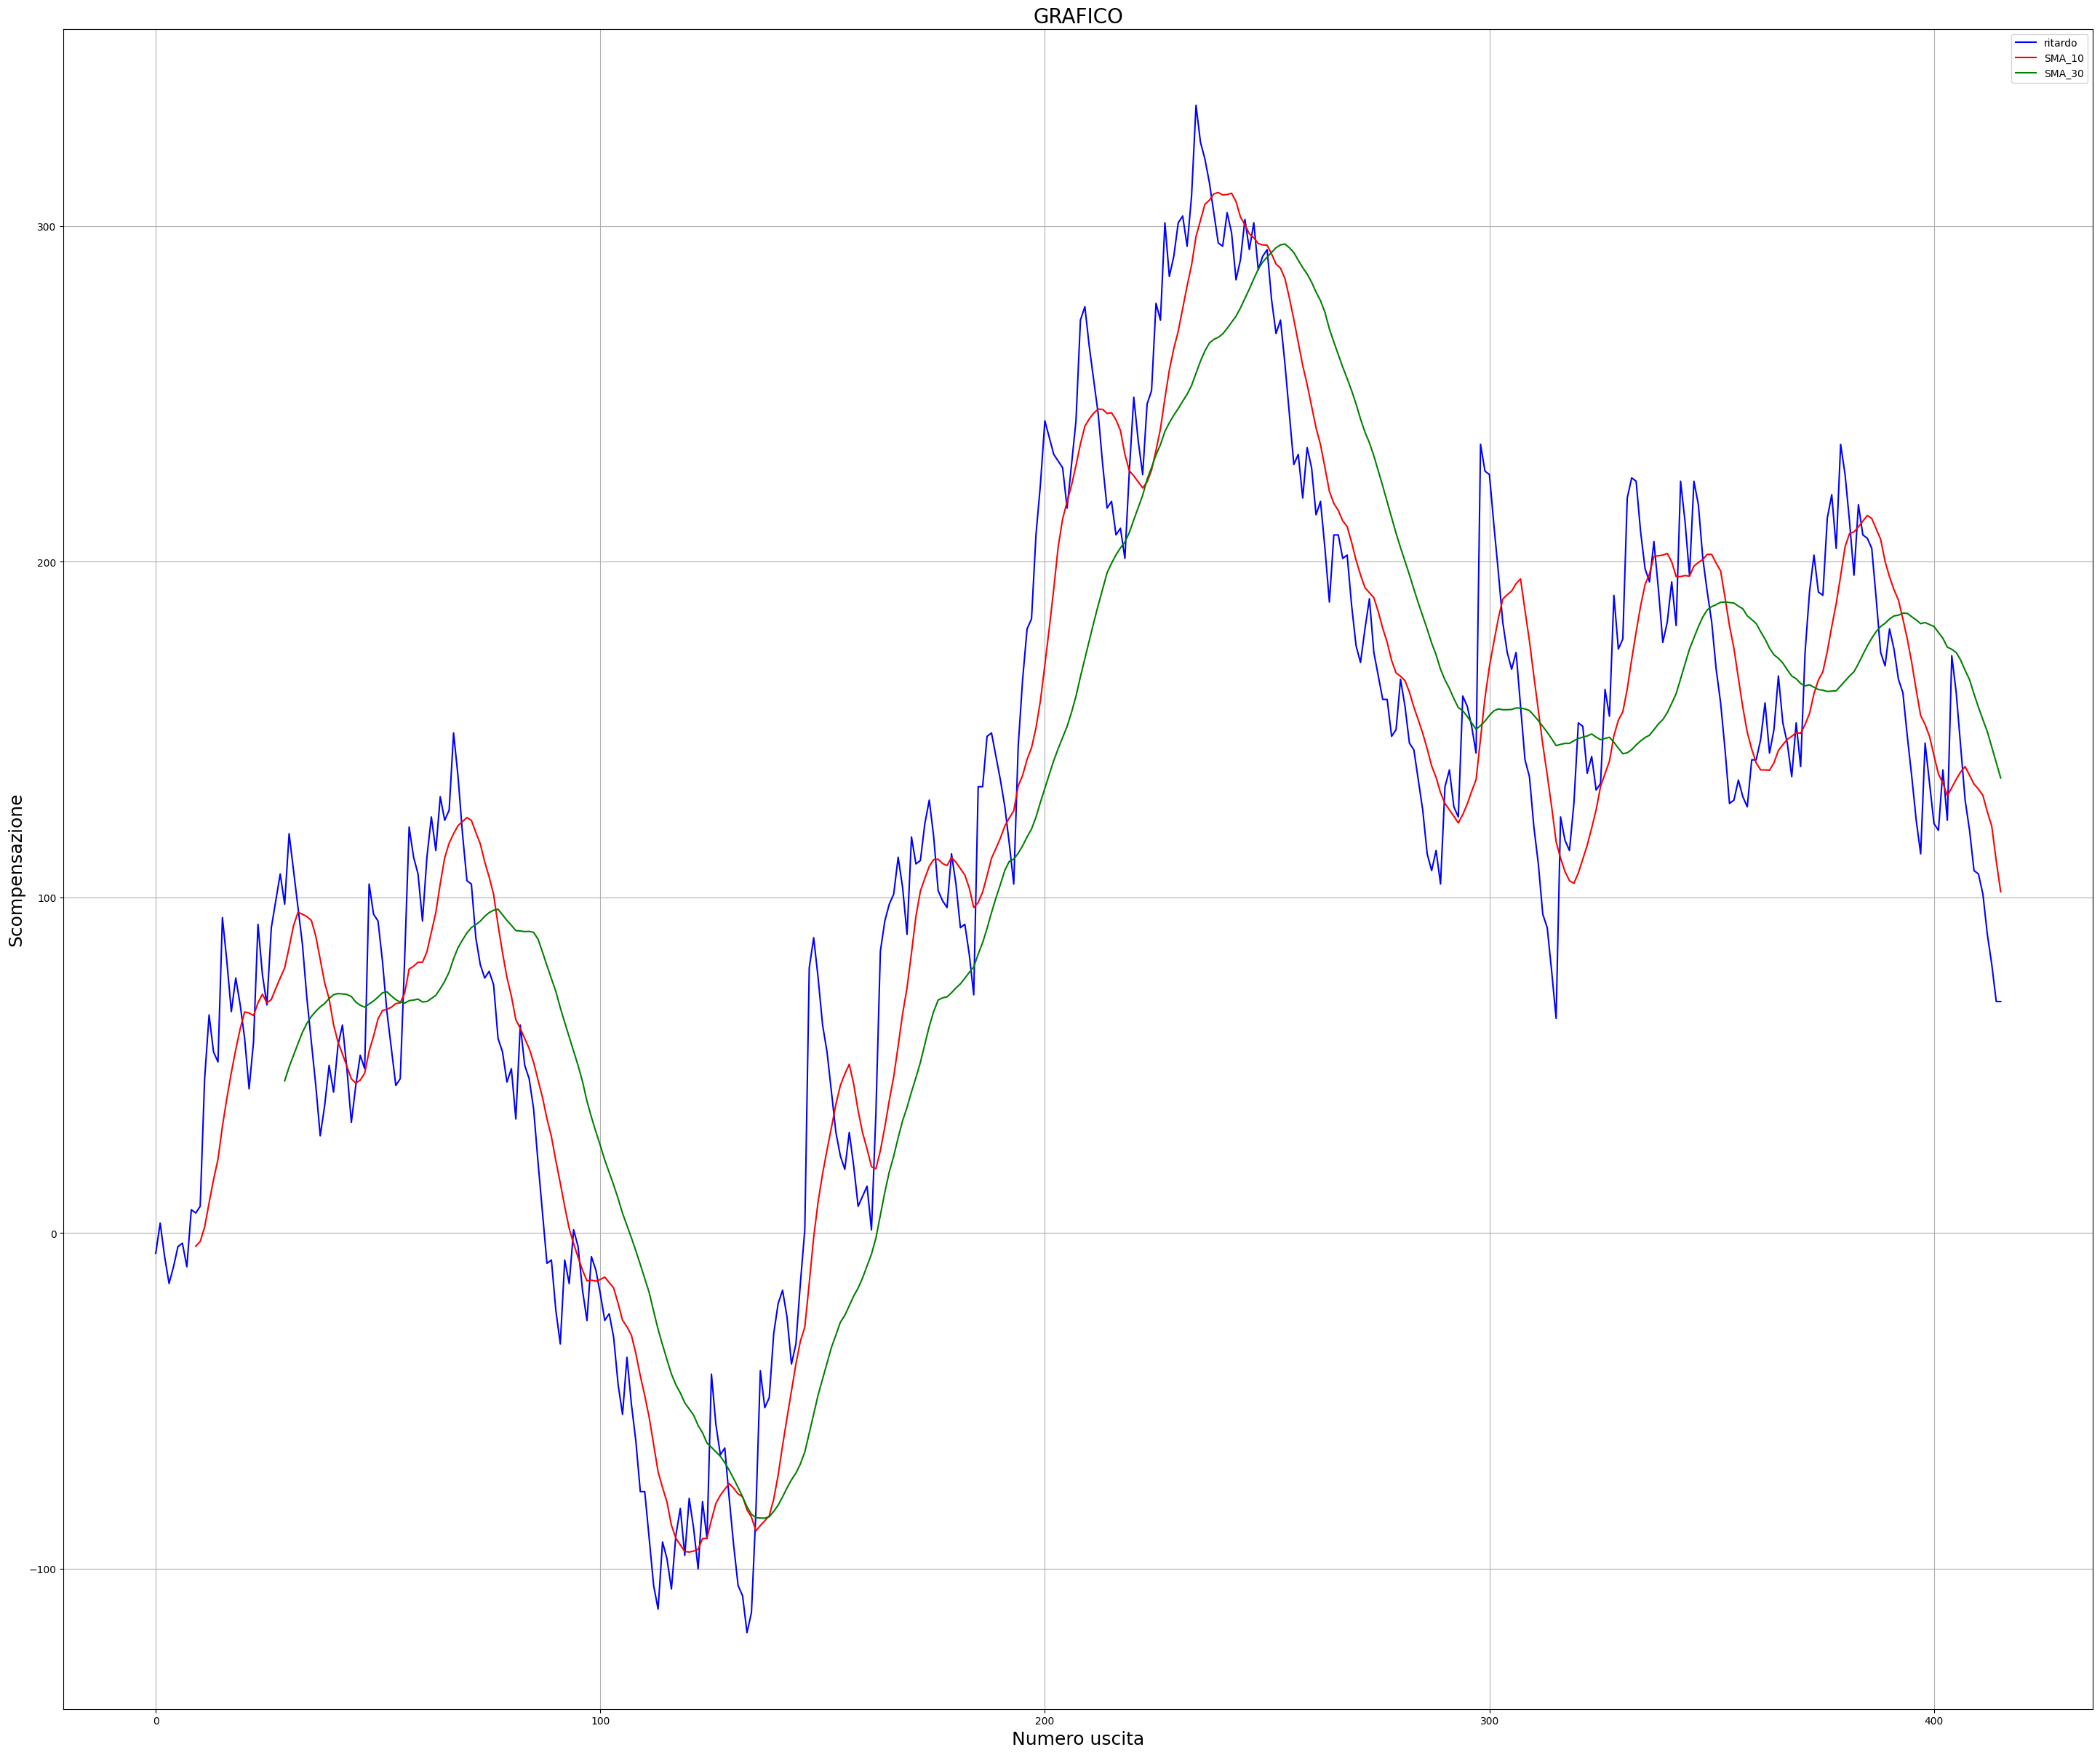

In [60]:
df = pd.DataFrame()

temp = Numero([81], fn.PATH_ESTR+"GE.csv")
#print(temp.scompensi)
temp.info()
temp.print_info()
#print(temp.ritardi)
n = str("close")
if temp.uscite_totali > 0:
    df[n] = temp.scompensi
    sma10 = df.ta.sma(length=10)
    sma30 = df.ta.sma(length=30)
    df = pd.concat([df[n], sma10, sma30], axis=1)
    #print(list(df))
    df['temp'] = (df['SMA_10'] - df['SMA_30'])
    df['Differenza'] = df['temp'].diff()
    df['scomp_sigLine'] = np.where(df['SMA_10'] > df['SMA_30'], 1, 0 )
    df['scomp_position'] = df['scomp_sigLine'].diff()
    df["Status"] = np.where(df['scomp_sigLine'] == 0, 'Frequente', 'Ritardatario')
    df["Ritardi"] = temp.ritardi
    df['Ritardi_sum'] = df['Ritardi'].cumsum()
    df["Frequenze"] = temp.frequenze
    df.to_csv("stats.csv")
else:
    print(f"{temp.numero} non è mai uscito")

#print(df[['scomp_position', 'Status']].to_string())
# prendiamo l'ultima estrazione in cui il trend della scompensazione è cambiato
a = df['scomp_position'][df['scomp_position'] != 0].index[-1]
# Prendiamo l'ultimo indice del df
b = len(df)-1
print(
    f"Attualmente e' un numero {df['Status'][b]}, il cui ultimo cambio di stato e' avvenuto {len(df)-a} uscite fa. I suoi ultimi 3 ritardi sono {df['Ritardi'][-3:].values}"
    )

# -1 vuol dire che da scompensato cerca di tornare a compensato quindi uscirà piu frequentemente
# 1 vuol dire che da compensato cerca di tornare a scompensato quindi uscirà meno frequentemente

plot_graph(df[['close', 'SMA_10', 'SMA_30']])

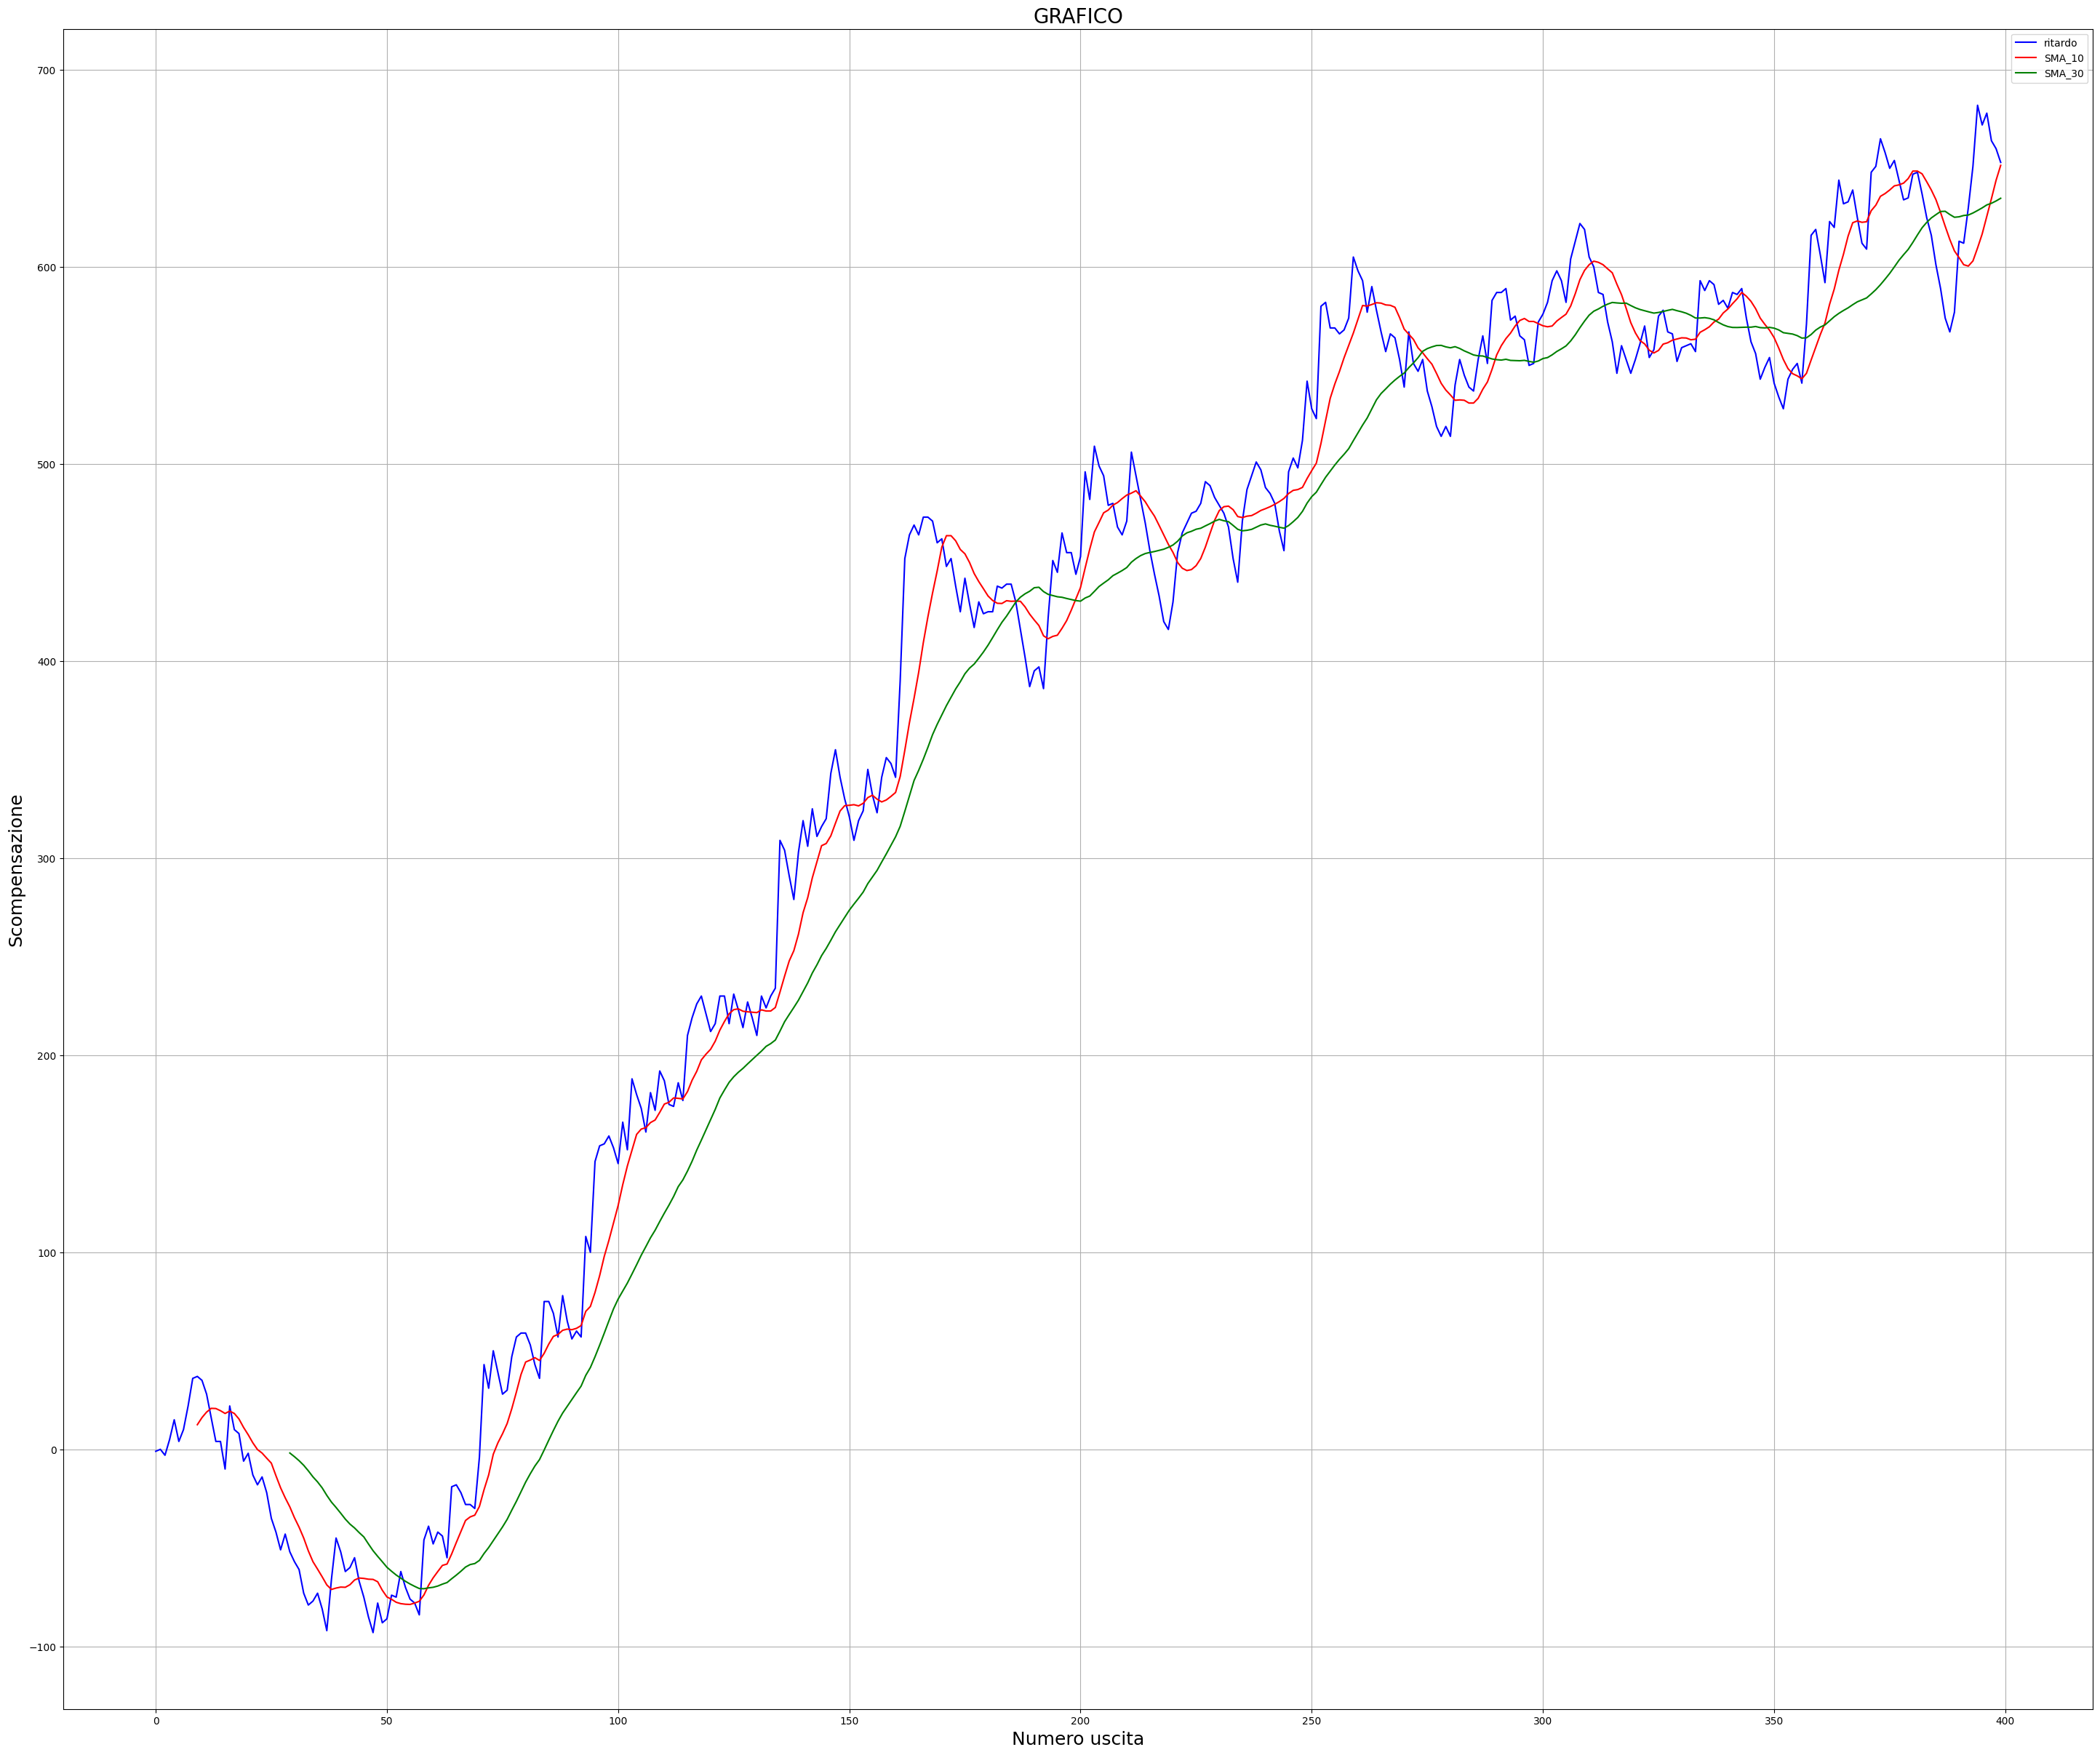

In [41]:
plot_graph(df[['close', 'SMA_10', 'SMA_30']])

In [ ]:
# proviamo a calcolare la curva di regressione polinomiale per vedere se si può fare una previsione

import warnings
warnings.filterwarnings("ignore")

# importiamo le metriche di valutazione
from sklearn.metrics import mean_squared_error, r2_score

# variabili indipendenti e dipendenti
x = df.index.values
y = df['Ritardi_sum'].values

lista_r2 = []   
for i in range(1, 100):

    z = np.polyfit(x, y, i)
    p = np.poly1d(z)

    # calcoliamo il MSE e il R2
    mse = mean_squared_error(y, p(x))
    r2 = r2_score(y, p(x))

    #print(f"MSE: {mse}, R2: {r2}")
    lista_r2.append(r2)

best_r2 = max(lista_r2)
best_degree = lista_r2.index(best_r2)
print(f"Best R2: {best_r2}")
print(f"Best Degree: {best_degree}")

z = np.polyfit(x, y, best_degree)
p = np.poly1d(z)

# calcoliamo il MSE e il R2
mse = mean_squared_error(y, p(x))
r2 = r2_score(y, p(x))

print(f"MSE: {mse}, R2: {r2}")


plt.plot(x, y, p(x), '-')
plt.legend(['Scompensi reali', 'Scompensi ipotizzati'])
plt.show()

# calcolo della previsone
print(f"Previsione: {p(362)}, uscirà tra {int(p(362)-y[-1])} estrazioni")

In [ ]:
# prendere i migliori 20 estratti per ruota in base al numero di volte che sono usciti (i piu' prequenti)
# nelle ultime estrazioni del mese precedente l'estrazione verifico che ambi sono usciti nei 20 numeri
# i migliori 3 ambi le rigioco in quartine per altre 13 estrazioni successive

In [ ]:
lista = []
for i in range(1, 91):
    temp = Numero([i], "BA.csv")
    temp.info()
    lista.append([temp.uscite_totali, i])
    #print(temp.uscite_totali)
    #temp.print_info()
    #temp.mostra_info()

new_lista = sorted(lista)
numeri = []
for i in range(len(new_lista[-20:])):
    #print(new_lista[i][1])
    numeri.append(new_lista[i][1])

print(numeri)

ambi = list(combinations(numeri, 2))

#print(ambi)
migliori = []
for i in ambi:

    temp = Numero(i, "BA.csv")
    #print(temp.scompensi)
    temp.info()
    #temp.print_info()
    if temp.ultimo_ritardo < 14:
        print(i, temp.ultimo_ritardo, temp.uscite_totali)
        migliori.append([temp.uscite_totali, temp.ultimo_ritardo, i])

temp = sorted(migliori)[-3:]
ambi_da_abbinare = []
for i in range(len(temp)):
    ambi_da_abbinare.append(temp[i][2])

quartine = list(combinations(ambi_da_abbinare, 2))
print(quartine)


PROVIAMO A VEDERE CHE CARATTERISTICHE HANNO I NUMERI CHE ESCONO METTENDOLI IN DATAFRAME

In [16]:
estrazioni = fn.leggi_da_csv(fn.PATH_ESTR+"BA.csv")
df_estrazioni = pd.DataFrame(estrazioni[1:], columns=estrazioni[0])
df_estrazioni = df_estrazioni.set_index('Data')
df_estrazioni.head()

,Ruota,1,2,3,4,5
Data,,,,,,
1939/01/07,BA,58,22,47,49,69
1939/01/14,BA,18,77,33,62,19
1939/01/21,BA,68,65,41,28,67
1939/01/28,BA,76,55,48,85,71
1939/02/04,BA,70,2,20,85,75


In [ ]:
# analiziamo la distribuzione dei numri della colonna 1 per vedere che tipo di distribuzione ha
# trasformiamo la colonna 1 in un vettore di interi
for i in ['1', '2', '3', '4', '5']:
    df_estrazioni[i] = df_estrazioni[i].astype(int)

# plottiamo nello stesso grafico le distribuzioni dei numeri
plt.figure(figsize=(20, 10))
plt.bar(df_estrazioni['1'].value_counts().index, df_estrazioni['1'].value_counts().values, color='blue', alpha=0.5)
plt.bar(df_estrazioni['2'].value_counts().index, df_estrazioni['2'].value_counts().values, color='red', alpha=0.5)
plt.bar(df_estrazioni['3'].value_counts().index, df_estrazioni['3'].value_counts().values, color='green', alpha=0.5)
plt.bar(df_estrazioni['4'].value_counts().index, df_estrazioni['4'].value_counts().values, color='yellow', alpha=0.5)
plt.bar(df_estrazioni['5'].value_counts().index, df_estrazioni['5'].value_counts().values, color='orange', alpha=0.5)
plt.show()



In [17]:
# Creiamo un dataframe con il ritardo e la scompensazione di ogni numero uscito
# creiamo un ciclo che itera su tutte le estrazioni e ad ogni estrazione calcola il ritardo e la scompensazione di ogni numero uscito 
# e li aggiunge al dataframe

# creiamo il vettore vuoto che conterrà i ritardi e le scompensazioni nonché la data di uscita
dati = [
    [estrazioni[1][0], np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN],
    [estrazioni[2][0], np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
    ]
colonne = ['Data', '1_rit', '1_scomp', '2_rit', '2_scomp', '3_rit', '3_scomp', '4_rit', '4_scomp', '5_rit', '5_scomp']

# creiamo un ciclo che itera su tutte le estrazioni
for i in range(3, len(estrazioni)):     # non metto il +1 perche' la prima riga e' l'intestazione
    #print('\r', i, sep=' ', end=' ', flush=True)

    # salviamo un file csv provvisorio che usiamo per i calcoli successivi
    fn.scrivi_su_csv('temp.csv', estrazioni[:i-1])

    # cicliamo per ogni numero uscito e calcoliamo il ritardo e la scompensazione
    temp1 = [estrazioni[i][0]]
    for n in estrazioni[i][2:]:
        
        temp = Numero(n, 'temp.csv')
        temp.info()
        temp1.append(temp.ultimo_ritardo)
        temp1.append(temp.scomp)
    dati.append(temp1)
    
    fn.progress(i, len(estrazioni))
# aggiungiamo i dati al dataframe
df = pd.DataFrame(dati, columns=colonne)

[############################# ]  100%                            ]  1%                              ]  1%                              ]  1%                              ]  1%                              ]  1%                              ]  1%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  2%                              ]  3%                              ]  3%                              ]  3%                              ]  3%                              ]  3%#                             ]  3%#                             ]  3%#                             ]  3%#                             ]  4%#                             ]  4%#                  

In [19]:
df.set_index('Data', inplace=True)

In [20]:
df = pd.concat([df_estrazioni, df], axis=1)

In [21]:
df.tail()

,Ruota,1,2,3,4,5,1_rit,1_scomp,2_rit,2_scomp,3_rit,3_scomp,4_rit,4_scomp,5_rit,5_scomp
Data,,,,,,,,,,,,,,,,
2023/07/14,BA,66,22,58,42,19,6718.0,NaN,6718.0,NaN,610.0,-3972.0,607.0,-1252.0,136.0,-978.0
2023/07/15,BA,19,31,33,71,80,137.0,-978.0,157.0,-507.0,6719.0,NaN,766.0,-2331.0,6719.0,NaN
2023/07/18,BA,65,14,43,57,10,922.0,-5506.0,527.0,2016.0,577.0,-899.0,395.0,-575.0,6720.0,NaN
2023/07/20,BA,10,59,71,54,55,6721.0,NaN,20.0,-3792.0,768.0,-2331.0,647.0,352.0,6721.0,NaN
2023/07/21,BA,61,67,22,43,19,160.0,-137.0,952.0,-1478.0,6722.0,NaN,579.0,-899.0,140.0,-978.0


In [22]:
df.to_csv('dati.csv')